# Exploratory Data Analysis (EDA)
## Student Dropout Prediction

This notebook performs an exploratory data analysis on the cleaned dataset 
`student_cleaned.csv`.

Objective:
- Assess data quality
- Analyze target distribution
- Understand feature behavior
- Identify key drivers of dropout
- Evaluate readiness for machine learning modeling

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
df = pd.read_csv("student_cleaned.csv")
TARGET = "Target"

df[TARGET] = df[TARGET].astype(int)

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (3861, 41)


,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Scholarship holder,Age at enrollment,Displaced,Debtor,Target,Application mode_2,Application mode_3,...,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17
0,0.000000,0,1,0,20,1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,14.000000,6,0,0,19,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.000000,0,0,0,19,1,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,13.428571,6,1,0,20,1,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12.333333,5,1,0,45,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Curricular units 1st sem (grade)     3861 non-null   float64
 1   Curricular units 1st sem (approved)  3861 non-null   int64  
 2   Tuition fees up to date              3861 non-null   int64  
 3   Scholarship holder                   3861 non-null   int64  
 4   Age at enrollment                    3861 non-null   int64  
 5   Displaced                            3861 non-null   int64  
 6   Debtor                               3861 non-null   int64  
 7   Target                               3861 non-null   int64  
 8   Application mode_2                   3861 non-null   bool   
 9   Application mode_3                   3861 non-null   bool   
 10  Application mode_4                   3861 non-null   bool   
 11  Application mode_5            

,Curricular units 1st sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Scholarship holder,Age at enrollment,Displaced,Debtor,Target
count,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000
mean,11.277344,5.014763,0.876198,0.261072,23.670034,0.529656,0.125097,0.306656
std,4.220135,3.021433,0.329398,0.439276,7.831609,0.499184,0.330872,0.461165
min,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,11.333333,4.000000,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000
50%,12.400000,5.000000,1.000000,0.000000,20.000000,1.000000,0.000000,0.000000
75%,13.471429,6.000000,1.000000,1.000000,26.000000,1.000000,0.000000,1.000000
max,18.875000,26.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000


In [4]:
# Missing values
missing = (df.isna().mean() * 100).sort_values(ascending=False)
missing[missing > 0]
# Duplicates
df.duplicated().sum()
# Low variance features
df.var(numeric_only=True).sort_values().head()

Application mode_11          0.000259
Application mode_10          0.000259
Previous qualification_10    0.000259
Application mode_18          0.000259
Previous qualification_5     0.000259
dtype: float64

Dropout rate: 30.67 %
Majority baseline accuracy: 69.33 %


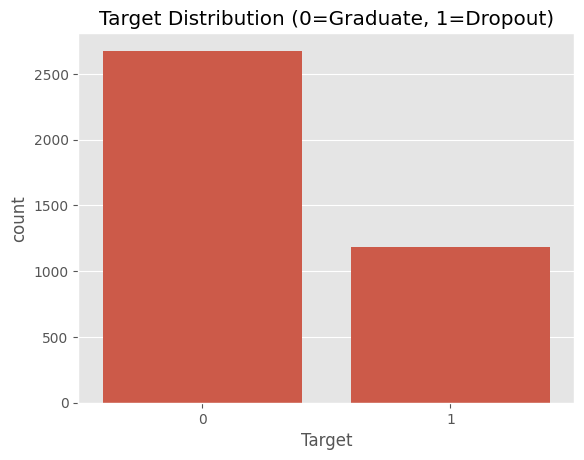

In [5]:
df[TARGET].value_counts()
df[TARGET].value_counts(normalize=True)
dropout_rate = df[TARGET].mean()
baseline_acc = max(dropout_rate, 1 - dropout_rate)

print("Dropout rate:", round(dropout_rate*100,2), "%")
print("Majority baseline accuracy:", round(baseline_acc*100,2), "%")

sns.countplot(x=TARGET, data=df)
plt.title("Target Distribution (0=Graduate, 1=Dropout)")
plt.show()

In [6]:
#Numeric Features Identification
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(TARGET)

numeric_cols

['Curricular units 1st sem (grade)',
 'Curricular units 1st sem (approved)',
 'Tuition fees up to date',
 'Scholarship holder',
 'Age at enrollment',
 'Displaced',
 'Debtor']

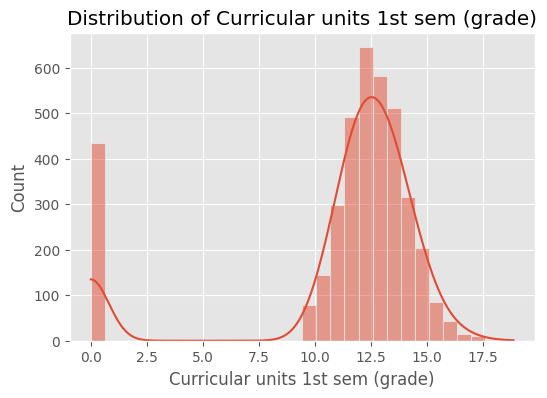

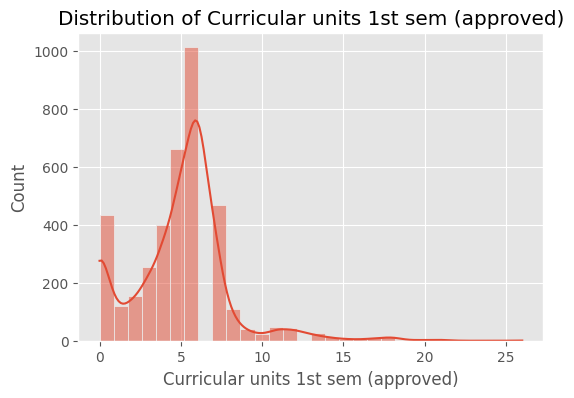

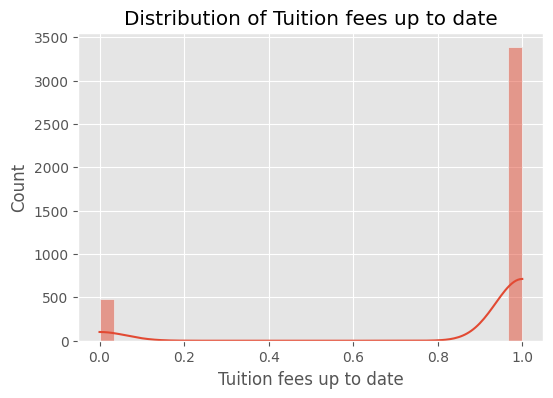

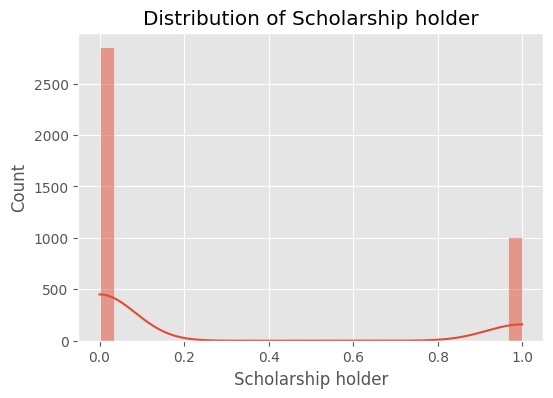

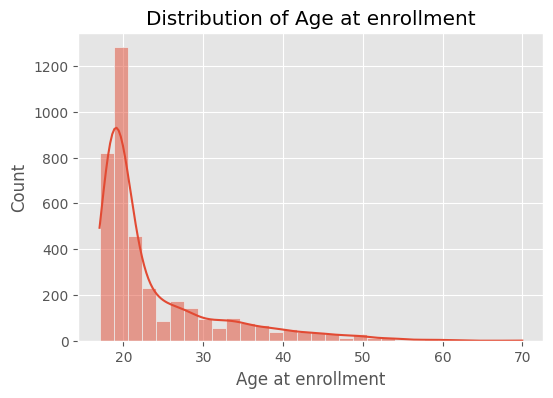

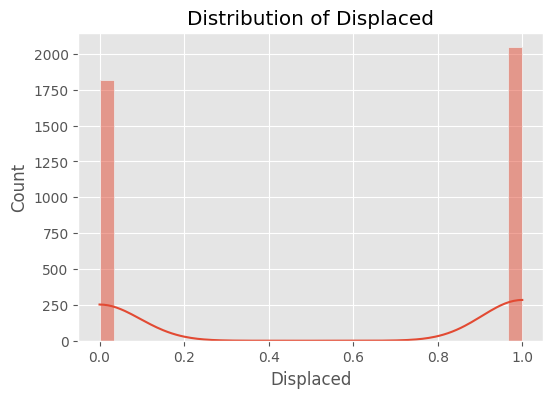

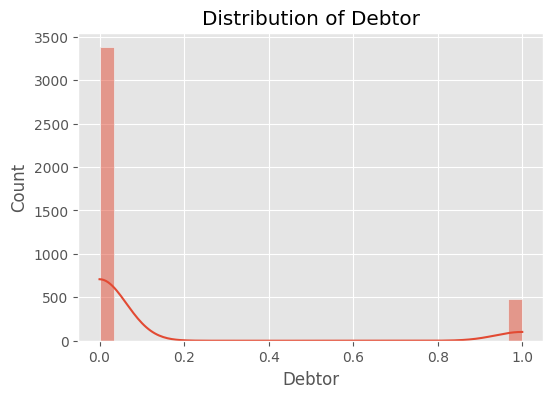

In [7]:
#Univariate Analysis (distributions)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [8]:
#Skewness Analysis
df[numeric_cols].skew().sort_values(ascending=False)

Debtor                                 2.267326
Age at enrollment                      1.943891
Scholarship holder                     1.088389
Curricular units 1st sem (approved)    0.914558
Displaced                             -0.118878
Curricular units 1st sem (grade)      -2.011335
Tuition fees up to date               -2.285335
dtype: float64

In [9]:
#Outliers Analysis 
def outlier_percentage(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).mean() * 100

for col in numeric_cols:
    print(col, "outlier %:", round(outlier_percentage(df[col]),2))

Curricular units 1st sem (grade) outlier %: 11.73
Curricular units 1st sem (approved) outlier %: 16.55
Tuition fees up to date outlier %: 12.38
Scholarship holder outlier %: 0.0
Age at enrollment outlier %: 8.91
Displaced outlier %: 0.0
Debtor outlier %: 12.51


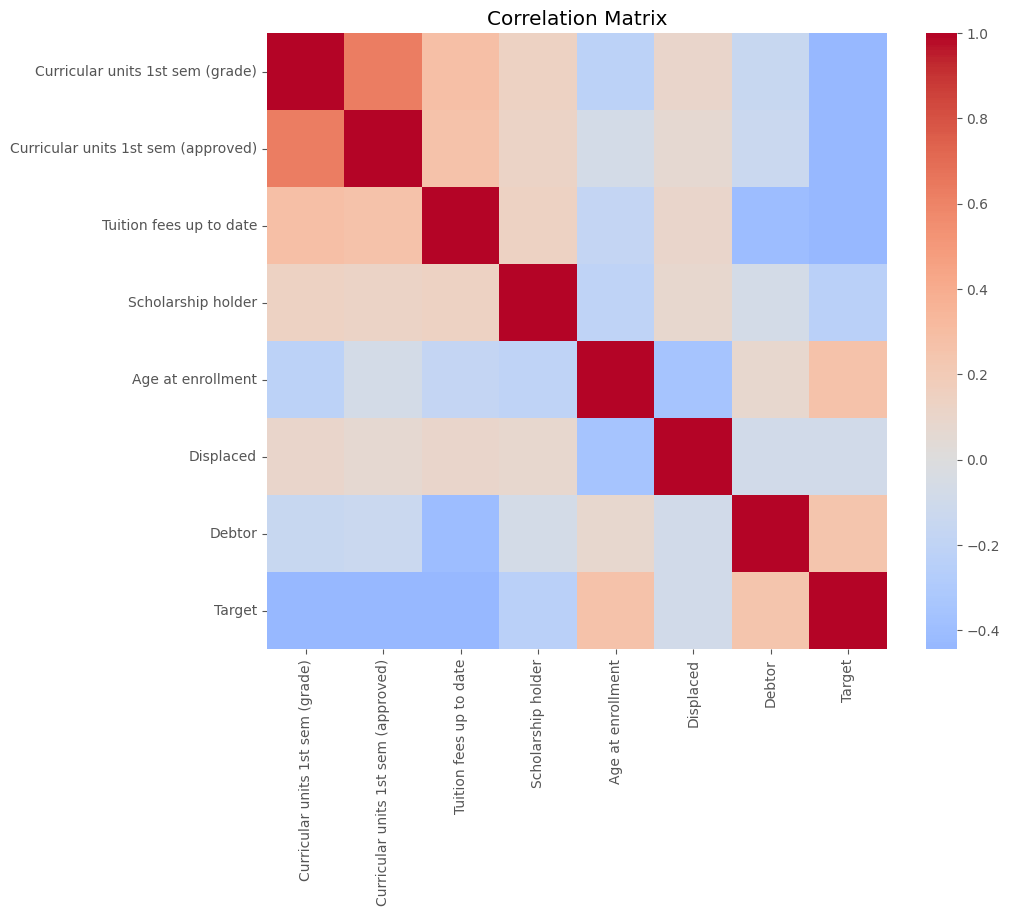

In [10]:
#Correlation Matrix 
corr = df[numeric_cols + [TARGET]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [11]:
#Correlation With Target (Feature Ranking)
corr[TARGET].abs().sort_values(ascending=False)

Target                                 1.000000
Tuition fees up to date                0.444126
Curricular units 1st sem (approved)    0.441481
Curricular units 1st sem (grade)       0.441355
Age at enrollment                      0.260503
Debtor                                 0.245991
Scholarship holder                     0.230333
Displaced                              0.092407
Name: Target, dtype: float64

In [12]:
#Multicollinearity Check
corr_abs = corr.abs()
np.fill_diagonal(corr_abs.values, 0)

high_corr_pairs = (
    corr_abs.stack()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"level_0": "Var1", "level_1": "Var2", 0: "AbsCorr"})
)

high_corr_pairs[high_corr_pairs["AbsCorr"] > 0.75].iloc[::2]

,Var1,Var2,AbsCorr



Mean of Curricular units 1st sem (grade) by Target:
Target
0    12.515883
1     8.477033
Name: Curricular units 1st sem (grade), dtype: float64


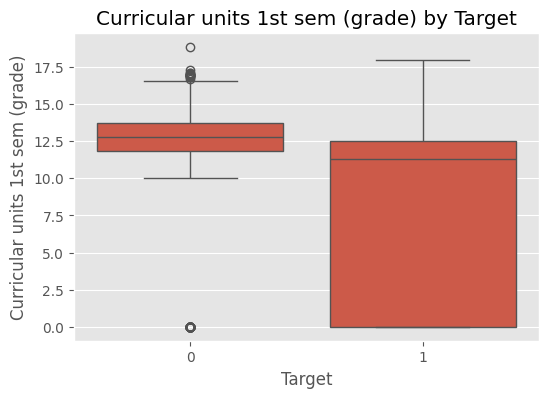


Mean of Curricular units 1st sem (approved) by Target:
Target
0    5.901756
1    3.009291
Name: Curricular units 1st sem (approved), dtype: float64


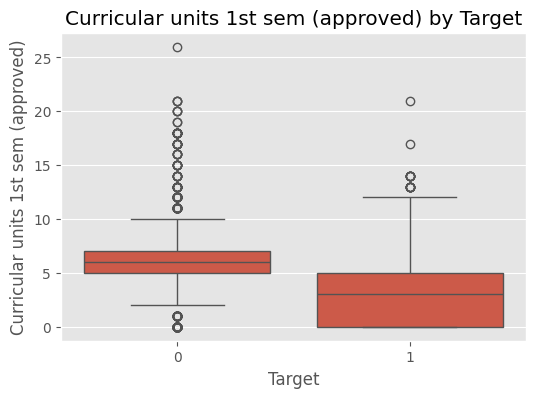


Mean of Tuition fees up to date by Target:
Target
0    0.973478
1    0.656250
Name: Tuition fees up to date, dtype: float64


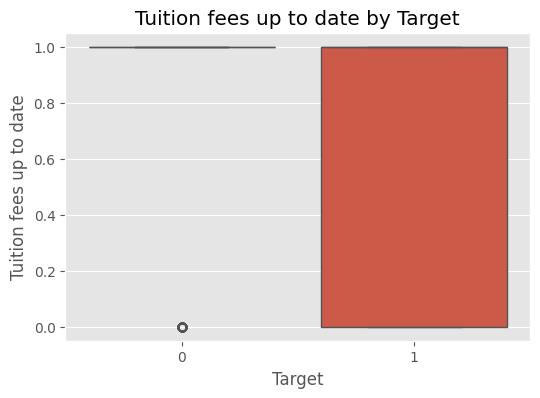


Mean of Scholarship holder by Target:
Target
0    0.328353
1    0.108953
Name: Scholarship holder, dtype: float64


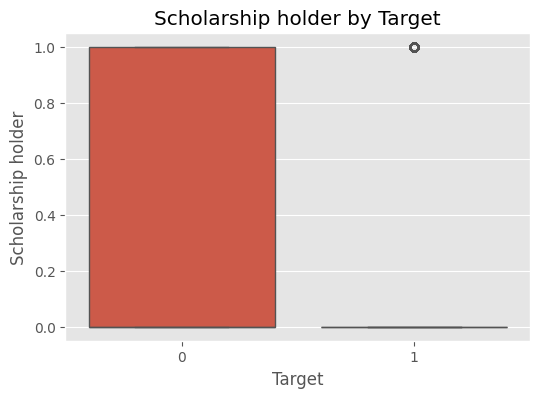


Mean of Age at enrollment by Target:
Target
0    22.313411
1    26.737331
Name: Age at enrollment, dtype: float64


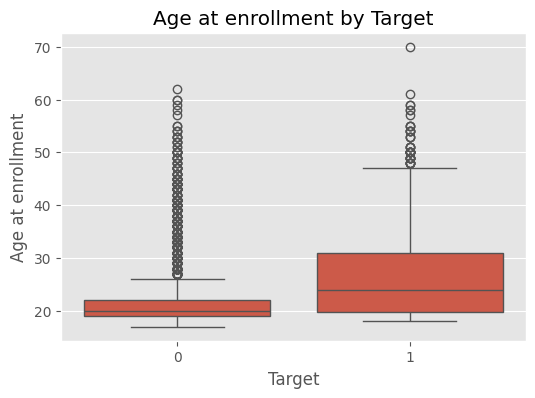


Mean of Displaced by Target:
Target
0    0.560329
1    0.460304
Name: Displaced, dtype: float64


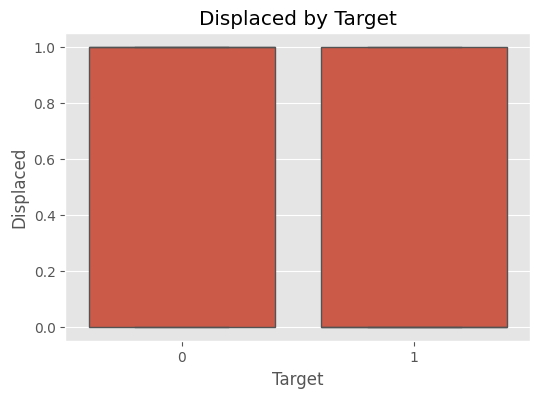


Mean of Debtor by Target:
Target
0    0.070975
1    0.247466
Name: Debtor, dtype: float64


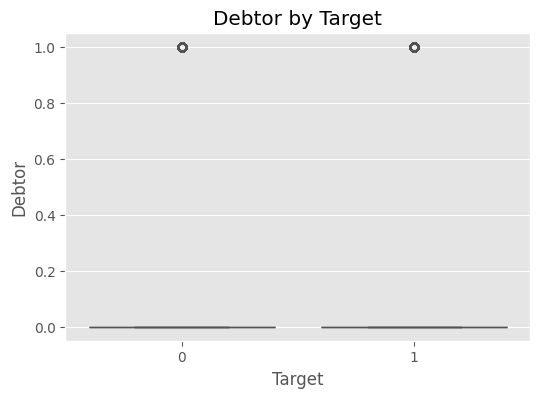

In [13]:
#Bivariate Analysis
for col in numeric_cols:
    print(f"\nMean of {col} by Target:")
    print(df.groupby(TARGET)[col].mean())

    plt.figure(figsize=(6,4))
    sns.boxplot(x=TARGET, y=col, data=df)
    plt.title(f"{col} by Target")
    plt.show()

In [14]:
#Segmentation Analysis 
if "Debtor" in df.columns:
    print("\nDropout rate by Debtor:")
    print(pd.crosstab(df["Debtor"], df[TARGET], normalize="index") * 100)

if "Scholarship holder" in df.columns:
    print("\nDropout rate by Scholarship holder:")
    print(pd.crosstab(df["Scholarship holder"], df[TARGET], normalize="index") * 100)

if "Displaced" in df.columns:
    print("\nDropout rate by Displaced:")
    print(pd.crosstab(df["Displaced"], df[TARGET], normalize="index") * 100)


Dropout rate by Debtor:
Target          0          1
Debtor                      
0       73.623446  26.376554
1       39.337474  60.662526

Dropout rate by Scholarship holder:
Target                      0          1
Scholarship holder                      
0                   63.021381  36.978619
1                   87.202381  12.797619

Dropout rate by Displaced:
Target             0          1
Displaced                      
0          64.812775  35.187225
1          73.349633  26.650367


In [15]:
#Early Risk Pattern
risk_conditions = []

if "Curricular units 1st sem (approved)" in df.columns:
    q25 = df["Curricular units 1st sem (approved)"].quantile(0.25)
    risk_conditions.append(df["Curricular units 1st sem (approved)"] <= q25)

if "Debtor" in df.columns:
    risk_conditions.append(df["Debtor"] == 1)

if len(risk_conditions) >= 2:
    high_risk = df[np.logical_and.reduce(risk_conditions)]
    print("High-risk size:", len(high_risk))
    print("High-risk dropout rate:", round(high_risk[TARGET].mean()*100,2), "%")
    print("Overall dropout rate:", round(df[TARGET].mean()*100,2), "%")

High-risk size: 259
High-risk dropout rate: 79.54 %
Overall dropout rate: 30.67 %


# Key Insights

1. The dropout rate indicates moderate class imbalance.
2. Academic performance variables show strongest correlation with dropout.
3. Financial-related features (e.g., Debtor) increase dropout probability.
4. Some features exhibit multicollinearity and may require selection.
5. The dataset appears clean and ready for supervised modeling.

Next step: Model training and feature selection.